In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
data =  pd.read_csv('/content/tested.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
data.shape

(418, 12)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# **CLEANING DATA**

In [10]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

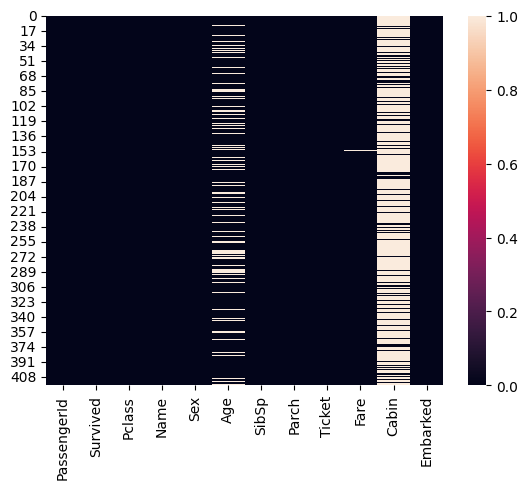

In [11]:
sns.heatmap(data.isnull())

<Axes: xlabel='Survived', ylabel='count'>

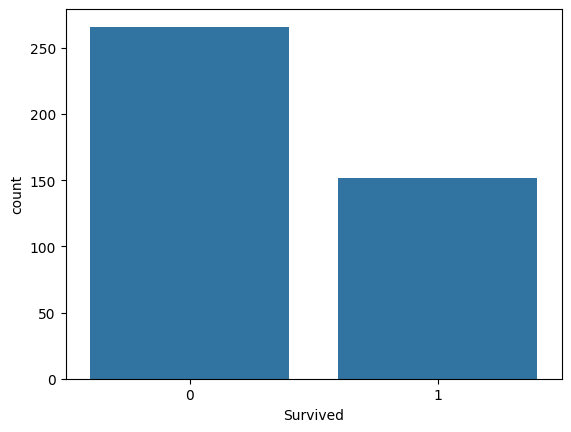

In [12]:
sns.countplot(x='Survived',data=data)

<Axes: xlabel='Survived', ylabel='count'>

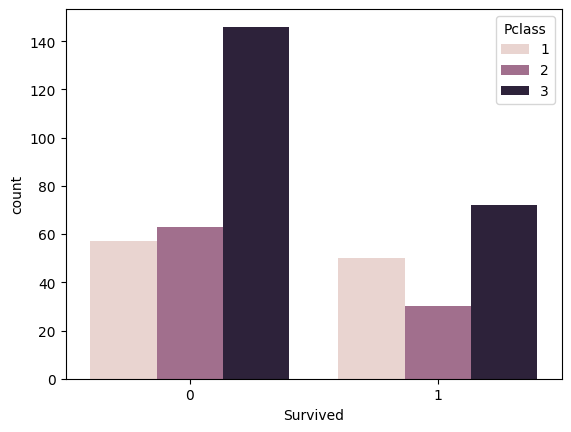

In [14]:
sns.countplot(x="Survived", hue = "Pclass",data=data)

<Axes: ylabel='Frequency'>

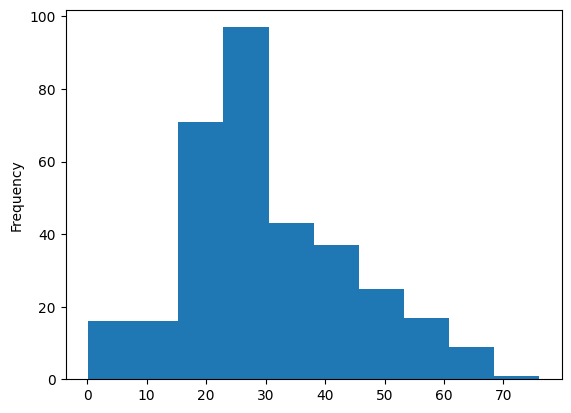

In [15]:
data["Age"].plot.hist()

<Axes: xlabel='SibSp', ylabel='count'>

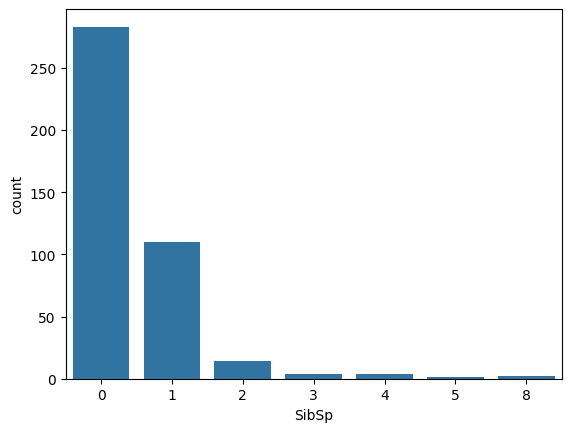

In [16]:
sns.countplot(x="SibSp",data=data)

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

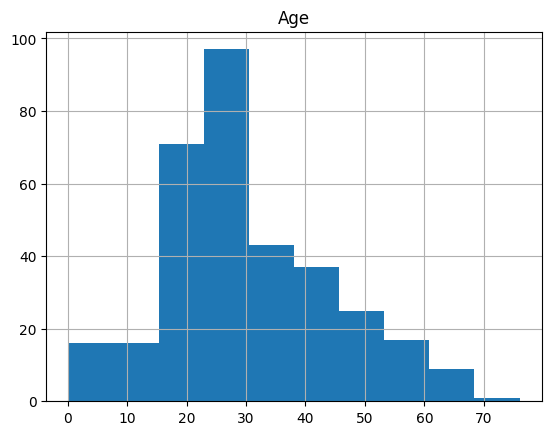

In [17]:
data.hist("Age")

array([[<Axes: title={'center': 'Fare'}>]], dtype=object)

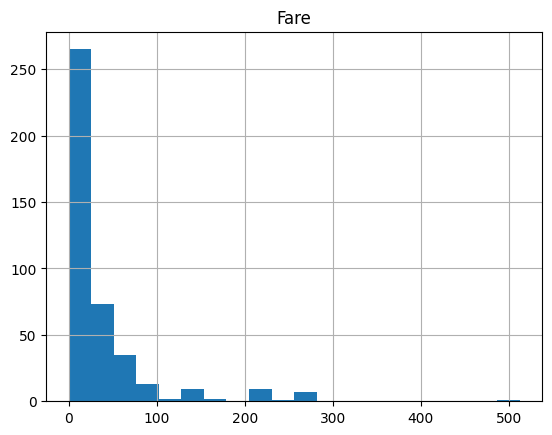

In [18]:
data.hist("Fare",bins=20)

<Axes: xlabel='Pclass', ylabel='count'>

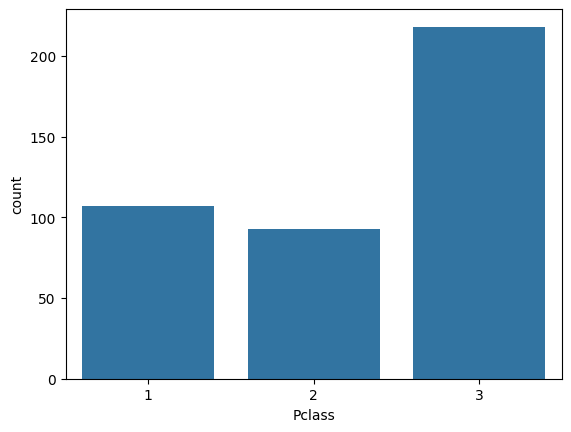

In [19]:
sns.countplot(x="Pclass",data=data)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


<Axes: xlabel='Survived', ylabel='count'>

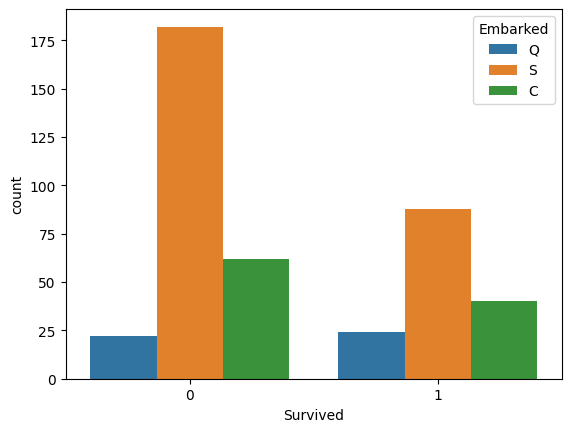

In [21]:
sns.countplot(x="Survived",hue="Embarked",data=data)

<Axes: xlabel='Survived', ylabel='count'>

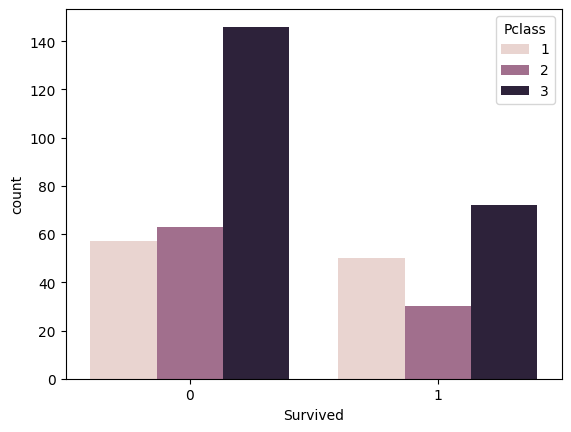

In [22]:
sns.countplot(x="Survived",hue="Pclass",data=data)

<Axes: xlabel='Parch', ylabel='count'>

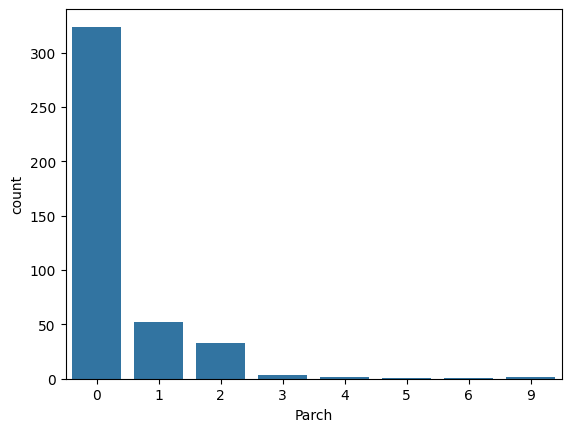

In [23]:
sns.countplot(x="Parch",data=data)

# **DATA CLEANING**

In [24]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

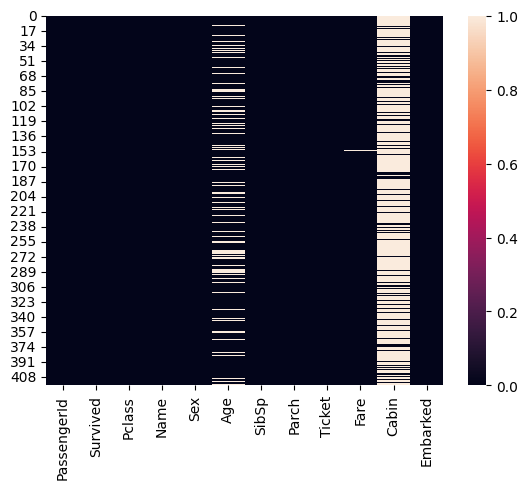

In [25]:
sns.heatmap(data.isnull())

In [26]:
data.drop("Cabin" , axis=1, inplace= True)

In [28]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q


In [30]:
data.dropna(inplace=True)

<Axes: >

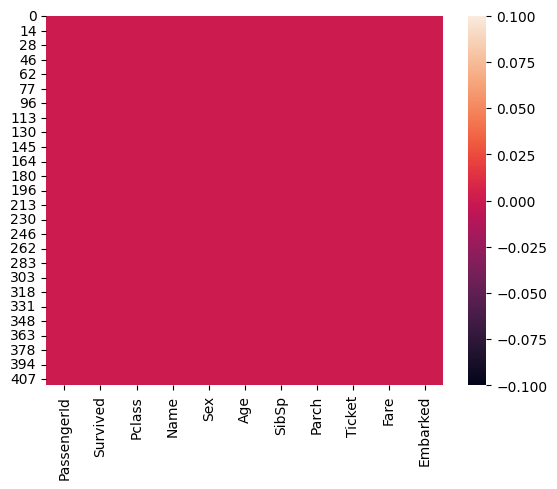

In [31]:
sns.heatmap(data.isnull())

In [32]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [33]:
data.shape

(331, 11)

In [34]:
categorical = [col for col in data.columns if data[col].dtype == 'object']
print("NON NUMERICAL: ",categorical)

Numerical = [col for col in data.columns if data[col].dtype != 'object']
print("NUMERICAL: ",Numerical)

NON NUMERICAL:  ['Name', 'Sex', 'Ticket', 'Embarked']
NUMERICAL:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [36]:
sex = pd.get_dummies(data["Sex"],drop_first=True)
sex.head()

,male
0,True
1,False
2,True
3,True
4,False


if Male is True then its male Otherwise its Female.

In [37]:
embark = pd.get_dummies(data["Embarked"],drop_first=True)
embark.head()

,Q,S
0,True,False
1,False,True
2,True,False
3,False,True
4,False,True


If Q is True then its Q

If S is True then its S

If Q and S are False then its C

In [38]:
pclass = pd.get_dummies(data["Pclass"],drop_first=True)
pclass.head()

,2,3
0,False,True
1,False,True
2,True,False
3,False,True
4,False,True


In [43]:
data = pd.concat([data,sex,embark,pclass],axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,True,True,False,False,True
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,False,False,True,False,True
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,True,True,False,True,False
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,True,False,True,False,True
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,False,False,True,False,True


In [44]:
data.drop(["PassengerId","Name","Pclass","Sex","Ticket","Embarked"],axis=1,inplace=True)

In [45]:
data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,34.5,0,0,7.8292,True,True,False,False,True
1,1,47.0,1,0,7.0000,False,False,True,False,True
2,0,62.0,0,0,9.6875,True,True,False,True,False
3,0,27.0,0,0,8.6625,True,False,True,False,True
4,1,22.0,1,1,12.2875,False,False,True,False,True


In [46]:
data.shape

(331, 10)

# **Splitting into Train and Test Data**

In [48]:
X = data.drop("Survived", axis=1).values
Y = data["Survived"].values

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.3, random_state=1)

In [51]:
from sklearn.linear_model import LogisticRegression

In [56]:
model = LogisticRegression()

In [57]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
y_pred = logisticregression.predict(X_test)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score

In [61]:
print("Classification report :", classification_report(Y_test,y_pred))

Classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00        43

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [62]:
print("Confusion Metrix:")
print(confusion_matrix(Y_test,y_pred))

Confusion Metrix:
[[57  0]
 [ 0 43]]


In [63]:
print("Accuracy score :", accuracy_score(Y_test,y_pred))

Accuracy score : 1.0


In [64]:
print("Training data accuracy:", logisticregression.score(X_train,Y_train))
print("Test data accuracy:", logisticregression.score(X_test,Y_test))

Training data accuracy: 1.0
Test data accuracy: 1.0
